# Generalizing trajectories

<img align="right" src="https://anitagraser.github.io/movingpandas/assets/img/movingpandas.png">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/anitagraser/movingpandas-examples/main?filepath=1-tutorials/7-generalizing-trajectories.ipynb)
[![IPYNB](https://img.shields.io/badge/view-ipynb-hotpink)](https://github.com/anitagraser/movingpandas-examples/blob/main/1-tutorials/7-generalizing-trajectories.ipynb)
[![HTML](https://img.shields.io/badge/view-html-green)](https://anitagraser.github.io/movingpandas-website/1-tutorials/7-generalizing-trajectories.html)

To reduce the size (number of points) of trajectory objects, we can generalize them, for example, using:

- Spatial generalization, such as Douglas-Peucker algorithm
- Temporal generalization by down-sampling, i.e. increasing the time interval between records
- Spatiotemporal generalization, e.g. using Top-Down Time Ratio algorithm

[Documentation](https://movingpandas.readthedocs.io/en/master/trajectorygeneralizer.html)

A closely related type of operation is [trajectory smoothing which is coverd in a separate notebook](./10-smoothing-trajectories.ipynb). 

In [3]:
import sys
from datetime import timedelta

import matplotlib.pyplot as plt
import movingpandas as mpd
from geopandas import read_file
from holoviews import opts

sys.path.append('/home/diviloper/MobilityDB/PyMEOS/')
from pymeos_cffi.functions import meos_initialize

import warnings

warnings.filterwarnings('ignore')

plot_defaults = {'linewidth': 5, 'capstyle': 'round', 'figsize': (9, 3), 'legend': True}
opts.defaults(opts.Overlay(active_tools=['wheel_zoom'], frame_width=500, frame_height=400))

meos_initialize()


MovingPandas 0.10.rc1

SYSTEM INFO
-----------
python     : 3.8.10 (default, Jun 22 2022, 20:18:18)  [GCC 9.4.0]
executable : /home/diviloper/.local/share/virtualenvs/PyMEOS-aif996WK/bin/python
machine    : Linux-5.10.102.1-microsoft-standard-WSL2-x86_64-with-glibc2.29

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.9.1
GEOS lib   : /usr/lib/x86_64-linux-gnu/libgeos_c.so
GDAL       : 3.4.1
GDAL data dir: /home/diviloper/.local/share/virtualenvs/PyMEOS-aif996WK/lib/python3.8/site-packages/fiona/gdal_data
PROJ       : 8.2.0
PROJ data dir: /home/diviloper/.local/share/virtualenvs/PyMEOS-aif996WK/lib/python3.8/site-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.11.1
pandas     : 1.4.3
fiona      : 1.8.21
numpy      : 1.23.1
shapely    : 1.8.2
rtree      : None
pyproj     : 3.3.1
matplotlib : 3.5.3
mapclassify: None
geopy      : 2.2.0
holoviews  : 1.15.0
hvplot     : 0.8.0
geoviews   : None
stonesoup  : None


In [4]:
gdf = read_file('./geolife_small.gpkg')
traj_collection = mpd.TrajectoryCollection(gdf, 'trajectory_id', t='t')

In [5]:
original_traj = traj_collection.trajectories[1]
print(original_traj)

Trajectory 2 (2009-06-29 07:02:25 to 2009-06-29 11:13:12) | Size: 897 | Length: 38764.6m
Bounds: (116.319212, 39.971703, 116.592616, 40.082514)
LINESTRING (116.590957 40.071961, 116.590905 40.072007, 116.590879 40.072027, 116.590915 40.072004, 


<AxesSubplot:>

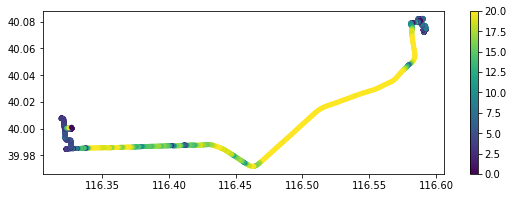

In [6]:
original_traj.plot(column='speed', vmax=20, **plot_defaults)

## Spatial generalization (DouglasPeuckerGeneralizer)

Try different tolerance settings and observe the results in line geometry and therefore also length:

<AxesSubplot:>

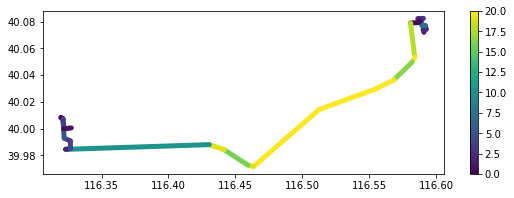

In [7]:
dp_generalized = mpd.DouglasPeuckerGeneralizer(original_traj).generalize(tolerance=0.001)
dp_generalized.plot(column='speed', vmax=20, **plot_defaults)

In [ ]:
dp_generalized

In [ ]:
print('Original length: %s' % (original_traj.get_length()))
print('Generalized length: %s' % (dp_generalized.get_length()))

## Temporal generalization (MinTimeDeltaGeneralizer)

An alternative generalization method is to down-sample the trajectory to ensure a certain time delta between records:

In [ ]:
time_generalized = mpd.MinTimeDeltaGeneralizer(original_traj).generalize(tolerance=timedelta(minutes=1))
time_generalized.plot(column='speed', vmax=20, **plot_defaults)

In [ ]:
time_generalized.to_point_gdf().head(10)

In [ ]:
original_traj.to_point_gdf().head(10)

## Spatiotemporal generalization (TopDownTimeRatioGeneralizer)

In [ ]:
tdtr_generalized = mpd.TopDownTimeRatioGeneralizer(original_traj).generalize(tolerance=0.001)

Let's compare this to the basic Douglas-Peucker result:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 4))
tdtr_generalized.plot(ax=axes[0], column='speed', vmax=20, **plot_defaults)
dp_generalized.plot(ax=axes[1], column='speed', vmax=20, **plot_defaults)